# 1 Import Data and Libraries

## 1.1 Import Libraries

In [1]:
# data processing
import random
import numpy as np
import pandas as pd


# modelling
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import LeaveOneOut
from surprise.model_selection import ShuffleSplit
from surprise import NMF
from surprise import SVD
from surprise import SVDpp
from surprise import KNNWithMeans
from surprise import CoClustering
from surprise import SlopeOne
from surprise import *

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
flatui = ["#FF9900", "#131A22", "#232F3E"]
sns.set(context="notebook", style='whitegrid', color_codes=True, palette=flatui)

# set seed
my_seed = 17
random.seed(my_seed)
np.random.seed(my_seed)


## 1.2 Import Dataset

In [2]:
# improt the raw data
raw = pd.read_json('Luxury_Beauty.json', lines=True)
raw.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         574628 non-null  int64 
 1   vote            103689 non-null  object
 2   verified        574628 non-null  bool  
 3   reviewTime      574628 non-null  object
 4   reviewerID      574628 non-null  object
 5   asin            574628 non-null  object
 6   reviewerName    574597 non-null  object
 7   reviewText      574228 non-null  object
 8   summary         574445 non-null  object
 9   unixReviewTime  574628 non-null  int64 
 10  style           251013 non-null  object
 11  image           7418 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 48.8+ MB


In [4]:
# fake or not
fake = pd.read_csv('the real fake beauty.csv')
fake.head()

,Unnamed: 0,RATING,VERIFIED_PURCHASE,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,...,way,well,without,work,works,would,years,fake,reviewerID,asin
0,0,2.0,True,224.0,4.0,16.9,17.0,4.0,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,A1Q6MUU0B2ZDQG,B00004U9V2
1,1,5.0,True,519.0,9.0,4.3,44.0,11.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,A3HO2SQDCZIE9S,B00004U9V2
2,2,5.0,True,17.0,1.0,0.9,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A2EM03F99X3RJZ,B00004U9V2
3,3,5.0,True,54.0,1.0,3.3,6.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A3Z74TDRGD0HU,B00004U9V2
4,4,5.0,True,55.0,3.0,-0.8,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A2UXFNW9RTL4VM,B00004U9V2


In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573829 entries, 0 to 573828
Columns: 113 entries, Unnamed: 0 to asin
dtypes: bool(1), float64(108), int64(2), object(2)
memory usage: 490.9+ MB


In [6]:
fake.columns

Index(['Unnamed: 0', 'RATING', 'VERIFIED_PURCHASE', 'TXT_LENGTH', 'num_sent',
       'FK_grade_score', 'stop_count', 'caps_count', 'punct_count', 'emojis',
       ...
       'way', 'well', 'without', 'work', 'works', 'would', 'years', 'fake',
       'reviewerID', 'asin'],
      dtype='object', length=113)

# 2 Data Exploration

## 2.1 Words Cloud of Reviews

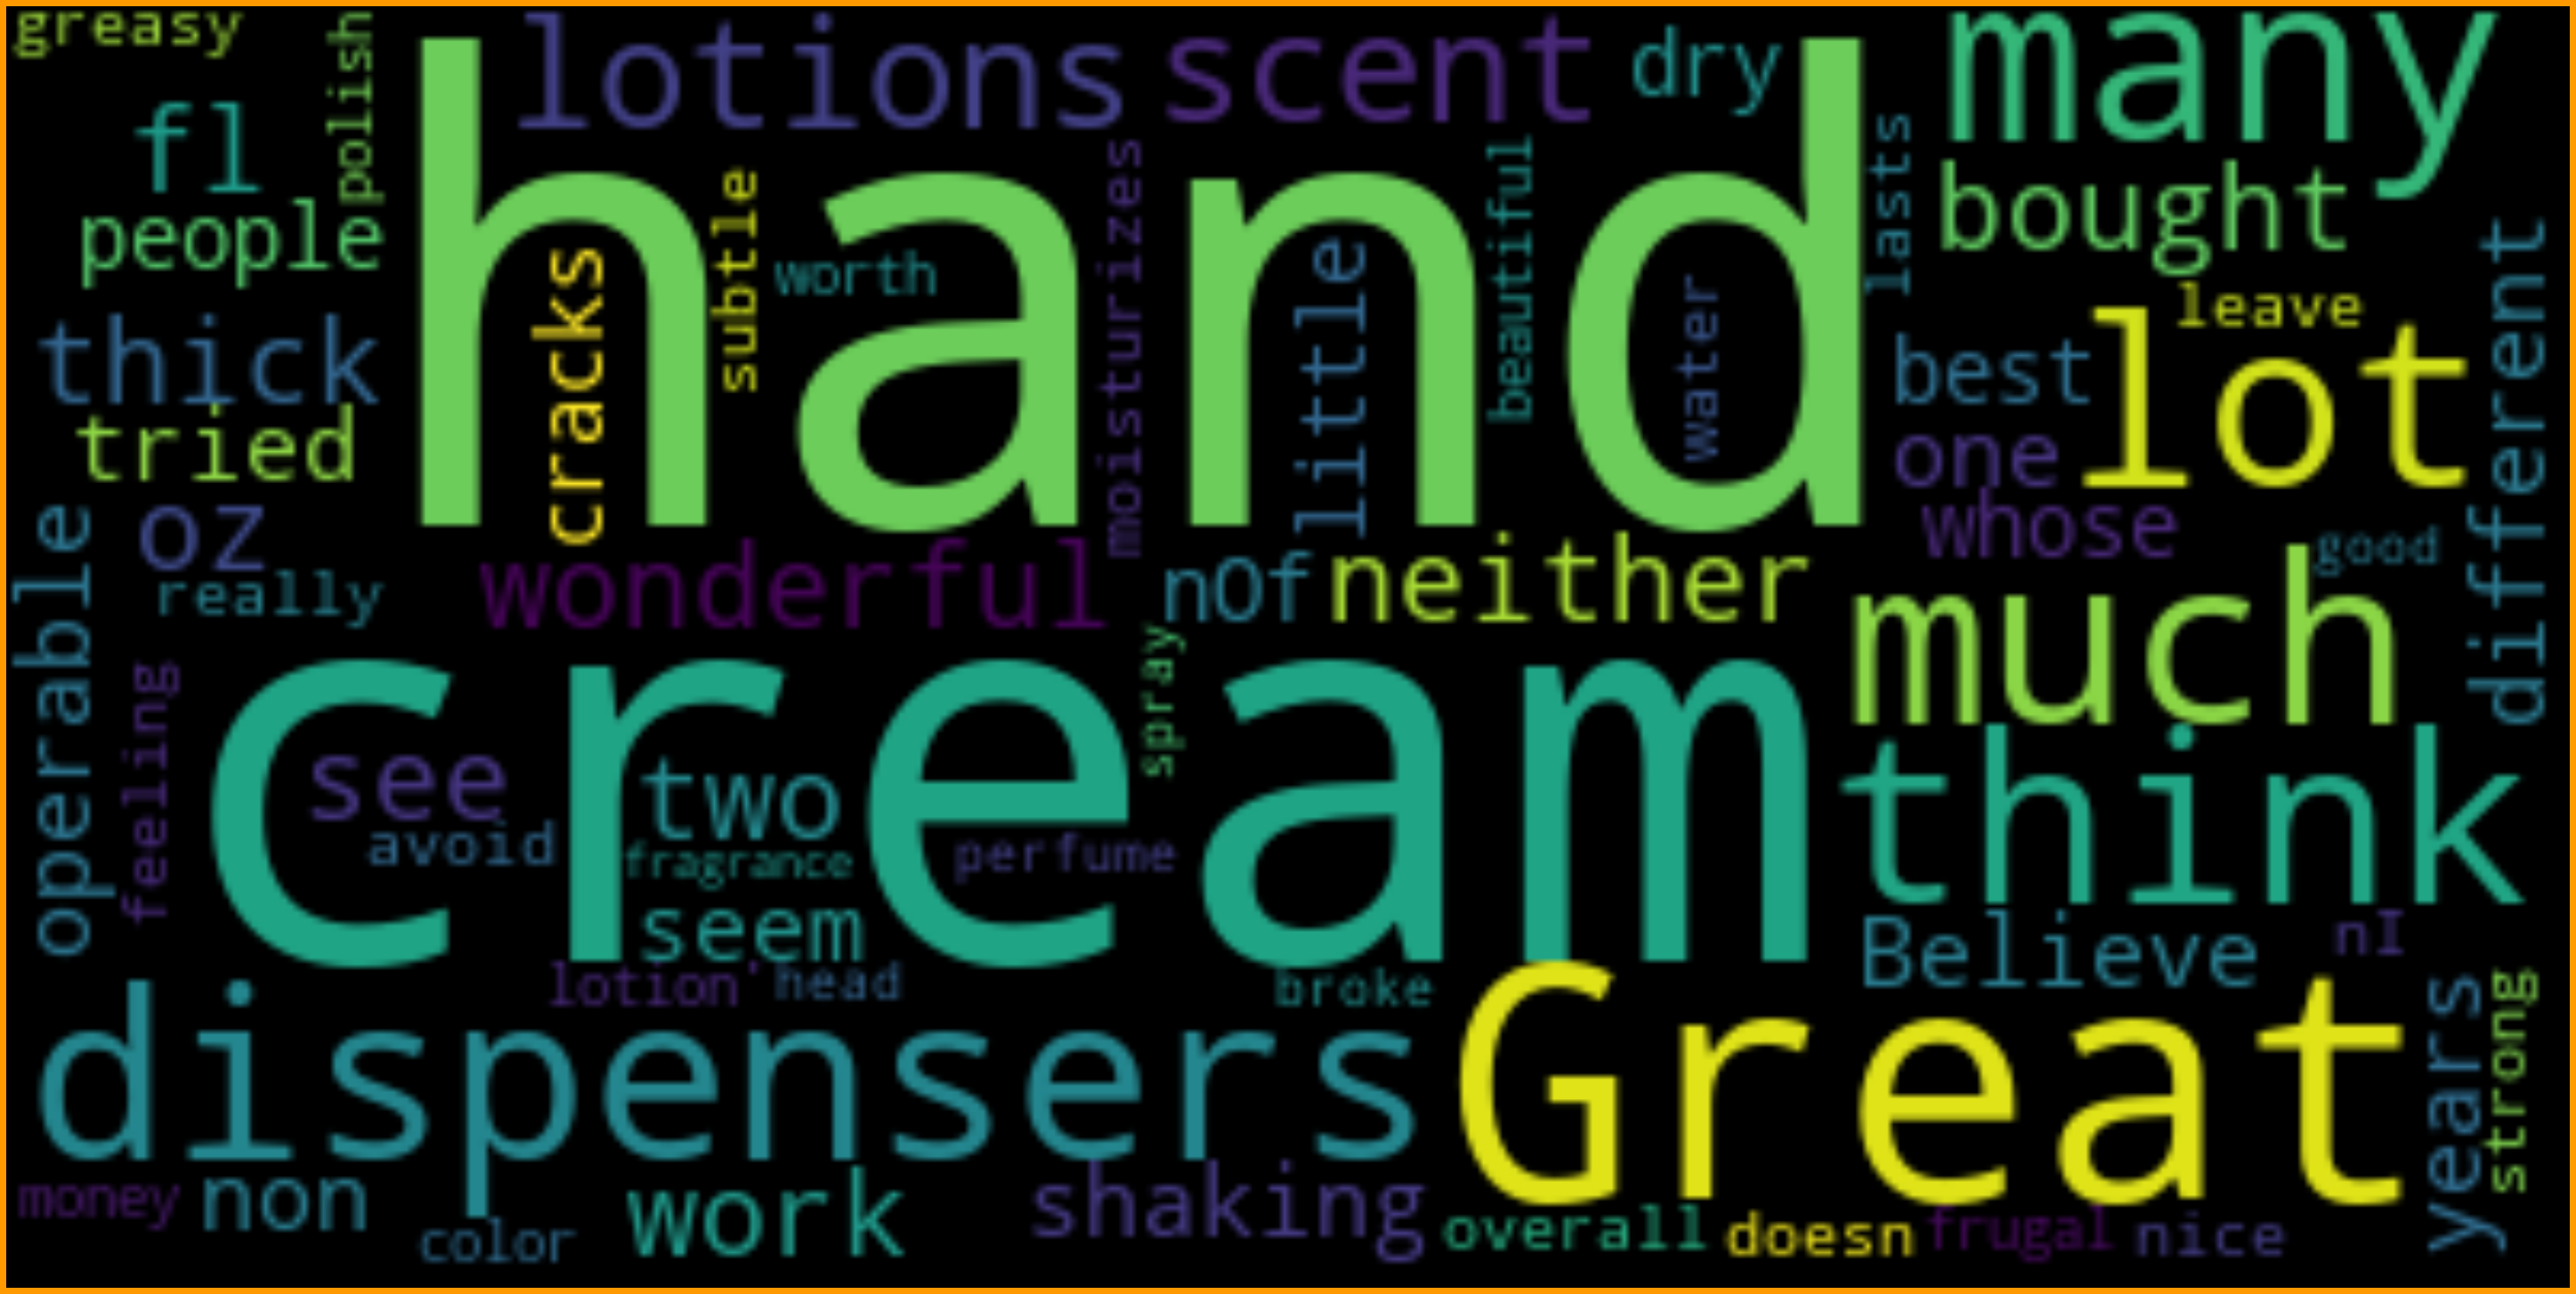

In [7]:
# display the word cloud of review text
text = raw['reviewText'].values
wordcloud = WordCloud().generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = '#FF9900',
    edgecolor = '#131A22')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [8]:
# write into csv for other usage
# raw.to_csv('Luxury_Beauty.csv',index=False)
# df.to_csv('Luxury_Beauty_fake.csv',index=False)
# copy the raw for further tuning
df = fake[['RATING', 'asin', 'reviewerID', 'fake']]


In [9]:
df.head()

,RATING,asin,reviewerID,fake
0,2.0,B00004U9V2,A1Q6MUU0B2ZDQG,0
1,5.0,B00004U9V2,A3HO2SQDCZIE9S,0
2,5.0,B00004U9V2,A2EM03F99X3RJZ,0
3,5.0,B00004U9V2,A3Z74TDRGD0HU,0
4,5.0,B00004U9V2,A2UXFNW9RTL4VM,0


In [10]:
# display the colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573829 entries, 0 to 573828
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RATING      573829 non-null  float64
 1   asin        573829 non-null  object 
 2   reviewerID  573829 non-null  object 
 3   fake        573829 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 17.5+ MB


In [11]:
# only leave the necessary columns
# filter out the fake review
df = df.loc[df['fake'] == 0 , ['RATING', 'asin', 'reviewerID' ]]


In [12]:
# rename the columns to interpretable names
df.rename(columns={"RATING": "Rating", "asin": "ProductID",
                   "reviewerID": "CustomerID"}, inplace=True)

## 2.2 Data Description

In [13]:
df.describe()

,Rating
count,480190.000000
mean,4.216360
std,1.300543
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
df.head()

,Rating,ProductID,CustomerID
0,2.0,B00004U9V2,A1Q6MUU0B2ZDQG
1,5.0,B00004U9V2,A3HO2SQDCZIE9S
2,5.0,B00004U9V2,A2EM03F99X3RJZ
3,5.0,B00004U9V2,A3Z74TDRGD0HU
4,5.0,B00004U9V2,A2UXFNW9RTL4VM


In [15]:
# shape and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480190 entries, 0 to 573828
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Rating      480190 non-null  float64
 1   ProductID   480190 non-null  object 
 2   CustomerID  480190 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.7+ MB


In [16]:
# check missing values
print('Number of missing values across columns: \n',
      df.isnull().sum())

Number of missing values across columns: 
 Rating        0
ProductID     0
CustomerID    0
dtype: int64


In [17]:
# check unique factors
print("Total Number of Ratings :", df.shape[0])
print("Total Number of Users   :", len(np.unique(df.CustomerID)))
print("Total Number of products  :", len(np.unique(df.ProductID)))

Total Number of Ratings : 480190
Total Number of Users   : 361329
Total Number of products  : 11822


In [18]:
# count of rating per user
ratings_per_user = df.groupby(
    by='CustomerID')['Rating'].count().sort_values(ascending=False)

ratings_per_user.head()

CustomerID
A2GJX2KCUSR0EI    128
AJL6HX8O2QLVO     128
A1O4PNHACFEDEM    124
A11Z3ANM4PQFMH    124
AJC7TSNP5UAWN     124
Name: Rating, dtype: int64

In [19]:
ratings_per_user.describe()

count    361329.000000
mean          1.328955
std           1.164246
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         128.000000
Name: Rating, dtype: float64

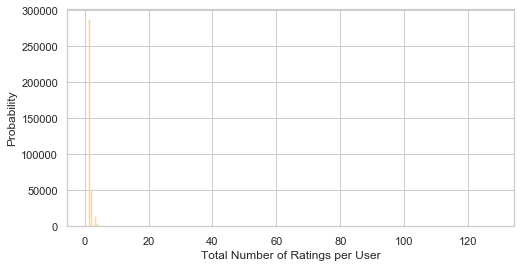

In [20]:
# plot the rating per user
plt.figure(figsize=(8,4))
sns.distplot(ratings_per_user.values, kde=False, bins=200)
plt.xlabel('Total Number of Ratings per User')
plt.ylabel('Probability')
plt.show()

In [35]:
# count of ratings per product
ratings_per_product = df.groupby(
    by='ProductID')['Rating'].count().sort_values(ascending=False)

ratings_per_product.head()

ProductID
B0013U0EYI    6148
B00176GSEI    4817
B00172O9NO    4711
B0017SWIU4    3399
B0002ZW5UQ    3067
Name: Rating, dtype: int64

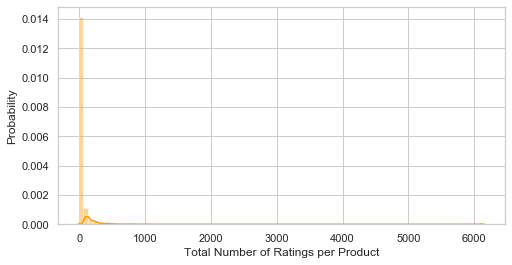

In [39]:
# plot the rating per product
plt.figure(figsize=(8,4))
sns.distplot(ratings_per_product.values, bins=100)
plt.xlabel('Total Number of Ratings per Product')
plt.ylabel('Probability')
plt.show()

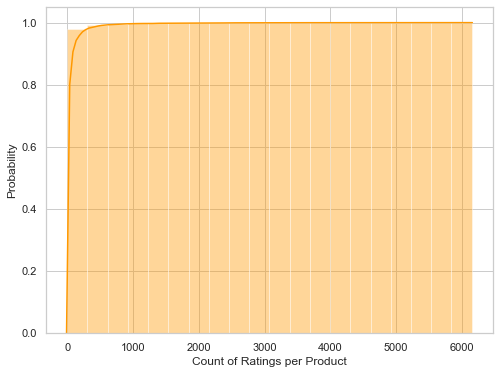

In [40]:
# cumlative distribution
plt.figure(figsize=(8, 6))
plt.xlabel('Count of Ratings per Product')
plt.ylabel('Probability')
kwargs = {'cumulative': True}

sns.distplot(ratings_per_product.values, bins=20, hist_kws=kwargs, kde_kws=kwargs)

In [42]:
# average score of each product
prod = pd.DataFrame(df.groupby('ProductID')['Rating'].mean())
prod.head()

,Rating
ProductID,
B00004U9V2,4.618217
B0000531EN,4.000000
B0000532JH,3.428571
B00005A77F,4.642857
B00005NDTD,4.876712


In [43]:
prod['Rating_Counts'] = pd.DataFrame(
    df.groupby('ProductID')['Rating'].count())

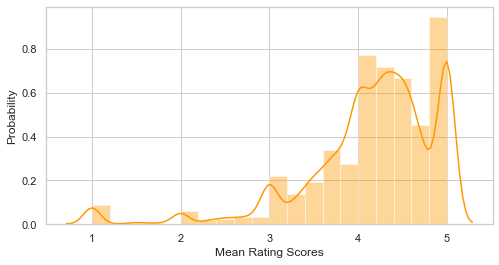

In [44]:
# plot out the distribution
plt.figure(figsize=(8,4))
sns.distplot(prod['Rating'], bins=20)
plt.xlabel('Mean Rating Scores')
plt.ylabel('Probability')
plt.show()

<Figure size 1440x576 with 0 Axes>

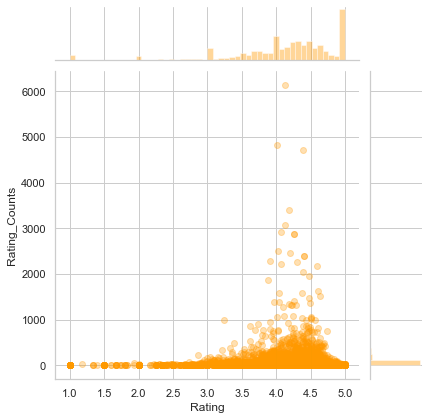

In [45]:
plt.figure(figsize=(20, 8))
sns.jointplot(x='Rating', y='Rating_Counts',
              data=prod, alpha=0.3)

# 3 Recommender System

## 3.1 Most Popular Products and Benchmark

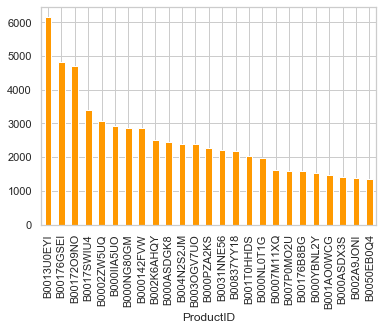

In [46]:
# find out the most popular product to recommend
most_popular = prod[prod['Rating']>=4].sort_values('Rating_Counts', ascending=False)
most_popular['Rating_Counts'].head(25).plot(kind = "bar")

In [62]:
ratings_per_product.describe()

count    11822.000000
mean        40.618339
std        155.569057
min          1.000000
25%          3.000000
50%          9.000000
75%         30.000000
max       6148.000000
Name: Rating, dtype: float64

In [75]:
#filter out products which contains less than 30 or more ratings
dat=df.groupby("ProductID").filter(lambda x:x['Rating'].count()>=30)

In [76]:
dat.shape

(411159, 3)

In [78]:
# prepare the data format for surprise package
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dat[['CustomerID', 'ProductID', 'Rating']],reader)

In [108]:
# get the benchmark of each model
benchmark = []
sim_options = {'user_based': False}
# Iterate over all algorithms
for algorithm in [KNNBaseline(sim_options = {'user_based': False}), KNNBasic(sim_options = {'user_based': False}), 
                  KNNWithMeans(sim_options = {'user_based': False}), SVD(), SVDpp(), SlopeOne(), 
                  NMF(), NormalPredictor(), KNNWithZScore(sim_options = {'user_based': False}), 
                  BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=[
                             'RMSE'], cv=3, verbose=True)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(
        ' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1692  1.1652  1.1692  1.1679  0.0019  
Fit time          1.96    2.14    2.12    2.07    0.08    
Test time         1.84    0.89    1.48    1.40    0.39    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2023  1.1956  1.2019  1.1999  0.0031  
Fit 

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,1.167857,2.073299,1.402192
SVD,1.191643,14.764405,1.010960
KNNWithZScore,1.197279,0.557455,1.464376
KNNWithMeans,1.197284,0.419854,1.176038
SVDpp,1.198505,25.466587,1.030109
KNNBasic,1.199923,0.318469,1.367486
CoClustering,1.223554,22.115091,0.548205
SlopeOne,1.225996,1.863536,0.768827
NMF,1.242295,27.246579,0.660897


## 3.2 User Based Collaborative Filtering

In [87]:
# # Item based

# time_start = time.time()
# param_grid = {'k': [9, 11, 13],
#               'sim_options': {'name': ['msd', 'pearson_baseline', 'cosine'],
#                               'min_support': [1, 3],
#                               'user_based': [True],
#                               'verbose': [False]}
#               }

# gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

# gs.fit(data)

# print('\n###############')
# # Best RMSE score
# print('Best Score :', gs.best_score['rmse'])

# # Combination of parameters that gave the best RMSE score
# print('Best Parameters :', gs.best_params['rmse'])
# print('###############')
# time_end = time.time()
# print('\ntime cost', time_end-time_start, 's')

## 3.3 Item Based Collaborative Filtering

In [82]:
# Item based

param_grid = {'k': [9, 11, 13],
              'sim_options': {'name': ['msd', 'pearson_baseline', 'cosine'],
                              'min_support': [1, 3],
                              'user_based': [False],
                              'verbose': [False]}
              }

gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done comput

## 3.4 Singular Value Decomposition

In [86]:
# SVD Singular Value Decomposition (SVD)
param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}
gs = GridSearchCV(SVD, measures=['RMSE'], param_grid=param_grid, cv=3)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 1.165177587018473
Best Parameters : {'n_factors': 50, 'lr_all': 0.05, 'reg_all': 0.04}
###############


## 3.5 Singular Value Decomposition ++

In [88]:
# SVDpp()

param_grid = {'n_factors': [50, 75], 'lr_all': [
    0.5, 0.05], 'reg_all': [0.06, 0.04]}

gs = GridSearchCV(SVDpp, measures=['RMSE'], param_grid=param_grid, cv=3)

gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 1.178408686906172
Best Parameters : {'n_factors': 50, 'lr_all': 0.05, 'reg_all': 0.06}
###############


## 3.6 Non-negative Matrix Factorization

In [91]:
# NMF
param_grid = {'n_factors': [10, 20, 30],
              'n_epochs': [15, 25]}

gs = GridSearchCV(NMF, measures=['RMSE'], param_grid=param_grid, cv=3)

gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 1.2260312587770512
Best Parameters : {'n_factors': 10, 'n_epochs': 25}
###############


## 3.7 Co Clustering

In [110]:
param_grid = {'n_cltr_u': [3, 5, 7], 'n_cltr_i': [3, 5, 7], 'n_epochs': [5, 10, 15]}

gs = GridSearchCV(CoClustering, measures=['RMSE'], param_grid=param_grid, cv=3)

gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 1.2187154298443985
Best Parameters : {'n_cltr_u': 5, 'n_cltr_i': 7, 'n_epochs': 5}
###############


## 3.8 Slope One

In [113]:
cross_validate(SlopeOne(), data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2168  1.2083  1.2134  1.2106  1.2145  1.2127  0.0030  
Fit time          2.08    2.41    2.49    2.46    2.37    2.36    0.15    
Test time         0.59    0.59    0.60    0.60    0.56    0.59    0.01    


{'test_rmse': array([1.21681681, 1.20834532, 1.21337184, 1.21059383, 1.21451153]),
 'fit_time': (2.077444314956665,
  2.4115517139434814,
  2.4922971725463867,
  2.4574453830718994,
  2.373704433441162),
 'test_time': (0.5934579372406006,
  0.5874731540679932,
  0.5974395275115967,
  0.602407693862915,
  0.560495138168335)}

# 4 Difference in Top 

In [115]:
fake = pd.read_csv('the real fake beauty.csv')
fake = fake[['RATING', 'asin', 'reviewerID', 'fake']]

fake.rename(columns={"RATING": "Rating", "asin": "ProductID",
                   "reviewerID": "CustomerID"}, inplace=True)


In [116]:
full=fake.groupby("ProductID").filter(lambda x:x['Rating'].count()>=100)
full=full.groupby("CustomerID").filter(lambda x:x['Rating'].count()>=30)
full.shape



(1754, 4)

In [118]:
pure = full[full['fake']==0]
pure.shape

(1390, 4)

In [120]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [124]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(full[['CustomerID', 'ProductID', 'Rating']],reader)

trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=3)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

AENH50GW3OKDA ['B000Q2Y04Y', 'B00IMRC4SY', 'B00LA5NKTM']
AHN86VFJIJ2JP ['B002P3L99G', 'B000H0SCXU', 'B000NG90NE']
A2YKWYC3WQJX5J ['B000G0JZYQ', 'B0015VP9CW', 'B00837YY18']
A3091RP0SPZLMN ['B0002MPS7G', 'B002DW44Y6', 'B01ELUGLUW']
A25QBCHO0KFT0P ['B000H0SCXU', 'B005EZSUS0', 'B00A9TZMQE']
A2V5R832QCSOMX ['B00LO2RO7K', 'B00XLYPGF6', 'B0079K5ZPY']
A2OW1FKQFPIA5D ['B004UMYEIS', 'B00A8JWJRA', 'B000NG90NE']
AQY5XBYSENNZQ ['B01DQG3DFI', 'B00JLQQ9UE', 'B002P3L99G']
A2BU0OBCKFDUKE ['B0002CEIQ8', 'B0015VP9CW', 'B004TMRW24']
A2JR5ZTSYSIQYX ['B01DQG3DFI', 'B00172XBOC', 'B00R5DS94O']
A2GJX2KCUSR0EI ['B01ELUGLUW', 'B01E9I43RO', 'B00LO2RO7K']
A2J6IZXSLF8VB2 ['B0001Z66UM', 'B0002CEIQ8', 'B0002Z90RM']
A24FOVVEIEAIPK ['B0015VP9CW', 'B0002CEIQ8', 'B0002MPS7G']
AJL6HX8O2QLVO ['B000XYPNMS', 'B001G60E3K', 'B002P3L99G']
A18VCM7Y7HK6EW ['B007NPX4LM', 'B00XLYPGF6', 'B0079K5ZPY']
A11Z3ANM4PQFMH ['B0010OKF7S', 'B00150GP3U', 'B00172XBOC']
A2V1MAUHH1YHKK ['B0013A6NFM', 'B0002CEIQ8', 'B002P3L99G']
AJC7TSNP5UAWN ['B0

In [125]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(pure[['CustomerID', 'ProductID', 'Rating']],reader)

trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=3)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

AENH50GW3OKDA ['B00CYHM7NU', 'B006X4LU9W', 'B00G930HW8']
AHN86VFJIJ2JP ['B001G60EK8', 'B0015VP9CW', 'B0047WYO1I']
A2YKWYC3WQJX5J ['B00A9TZMQE', 'B00070PNGO', 'B00OKME7S0']
A2V5R832QCSOMX ['B004XMAVFA', 'B002DW44Y6', 'B00JGX9C6A']
A2OW1FKQFPIA5D ['B00383HHT8', 'B014UC1QE2', 'B001GAOV9Y']
A2BU0OBCKFDUKE ['B011J6HJKM', 'B004MZMEGC', 'B00LO2RO7K']
A2JR5ZTSYSIQYX ['B00JRW7QCC', 'B004UMYEIS', 'B00846IUA4']
A2GJX2KCUSR0EI ['B0157UMHXK', 'B000G0JZYQ', 'B00JGX9C6A']
A2J6IZXSLF8VB2 ['B0006PJRVM', 'B00070PNGO', 'B000PZ4QBY']
A24FOVVEIEAIPK ['B0015VP9CW', 'B002P3L99G', 'B0038COKQ2']
AJL6HX8O2QLVO ['B001FBCLS2', 'B00080DK86', 'B00B4LKGIK']
A3091RP0SPZLMN ['B0015VP9CW', 'B011J6HJKM', 'B0006PJRRG']
A25QBCHO0KFT0P ['B0015VP9CW', 'B0068M4E6A', 'B000NGI4QI']
AQY5XBYSENNZQ ['B001FBCLS2', 'B0010OKF7S', 'B0015VP9CW']
A18VCM7Y7HK6EW ['B014UC1QE2', 'B00IMRC4SY', 'B000XYPNMS']
A11Z3ANM4PQFMH ['B000XYPNMS', 'B00ZY65RUI', 'B00070PNGO']
A2V1MAUHH1YHKK ['B003OGV7UO', 'B001T0HHDS', 'B005LW0BI8']
AJC7TSNP5UAWN ['B0